# Mechanics Lab 11 – The Approach to Chaos

Chaotic behavior is behavior which is highly-sensitive to initial conditions. In chaotic systems small differences in initial conditions grow exponentially. Since we cannot know precisely the initial conditions of any real-world phenomena, chaotic systems are effectively impossible to predict even though they are deterministic.

For a system to exhibit chaos it must be non-linear and sufficiently complex. We've talked in class about how linear differential equations can be analytically solved (so not chaotic) but non-linear ones frequently can't be (so potentially chaotic). Not all non-linear systems are chaotic, though. For instance, a simple pendulum is non-linear but very predictable. For a pendulum to exhibit chaotic behavior complexity must be added -- here in the form of driving and damping.

Over the next two weeks we will be investigating the behavior of a damped, driven pendulum (DDP). This system can exhibit chaotic behavior but doesn't always. In this lab you'll study the approach to chaos by modeling the DDP in the chaotic and non-chaotic regimes.

## Objectives

In this lab you will 
* model a damped, driven pendulum;
* identify period doubling from the pendulum's motion;
* follow the approach to chaos;
* and show that solutions generated from very similar initial conditions diverge for chaotic systems.

In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential equation integrator

Populating the interactive namespace from numpy and matplotlib


## Equation of motion
#### Exercise 11.1
You'll need to find the equation of motion for a damped driven pendulum to numerically model its behavior. To do this, start by determining the equation of motion for a simple pendulum and then add in damping and driving.

** Step 1)** Starting with Newton's 2nd Law in angular form, $\sum \vec{\tau}= I\vec{\alpha}$, with $\tau = \vec{r}\times\vec{F}$, determine the restoring torque for a simple pendulum (just a point mass m on a frozen massless string of length $L$):

\

** Step 2)** Write down the moment of inertia of a point mass at radius equal to the length of the pendulum:

\


** Step 3)** Hence the second derivative of the angle is some function of the angle.  That's the equation of motion for a simple pendulum. Write it here (don't divide out any $L$ and $m$ terms yet).

\

** Step 4)** Modify your equation of motion to include damping by adding a term to the force (torque) side of the equation to represent linear air resistance. 

\

** Step 5)** Further modify your equation of motion to include driving by adding a sinusoidally varying torque: $L F_0 \cos \omega t$. 

\

** Step 6)** Determine the natural angular frequency of a simple pendulum, $\omega_0$. 

\

** Step 7)** Now simplify your equation of motion and rewrite it in terms of $\omega_0$, a damping constant ($\beta = \frac{b}{2 m}$), and a dimensionless parameter $\gamma$ representing the drive strength ($\gamma = \frac{F_0}{mg}$). When $\gamma$ is small, the weight is more than the driving force and the resulting force will be small. As we increase $\gamma$ above 1, the pendulum will start to display chaotic motion. Check your equation with your instructor.

\


## Numerical Solution
### Defining the constants

Let angular frequency of the driving force ($\omega$ or omegaD) equal 2$\pi$. Set the natural frequency ($\omega_0$ or omega0) equal 1.5$\omega$, and set the damping constant ($\beta$ or betaD) to $\frac{\omega_0}{4}$.

We will be changing drive strength ($\gamma$ or gammaD).


#### Exercise 11.2
What do you expect the period of the DDP to be?

\ In the long term, period is equal to that of the driving force, which is 1 second

#### Exercise 11.3
In the cell below, set all the constants associated with the system *except* $\gamma$ as global variables.

In [2]:
# Set the variables omegaD, omega0 and betaD
omega = 2*pi
omega0 = 3*pi
beta = 3*pi/4

### Numerically solve the equation of motion

#### Exercise 11.4
Use the given equation of motion to write a function to return the derivatives of your two variables, $\phi$ and $\dot\phi$. You'll be changing the value of $\gamma$ throughout the lab so rather than setting $\gamma$ as a global variable, allow it to be passed as an element of a parameter array to the deriv function. 

To find solutions we'll also need a set of initial conditions.  For the most part we will have the pendulum start from rest in line with the vertical: $\phi(0) = 0$ and  $\dot \phi(0) = 0$.

Numerically solve the equations of motion for $\phi$ for time $0 < t < 10$. Let $\gamma$ = 0.2. 

Finally, plot $\phi(t)$ versus t, and check to make sure that your graph makes sense.

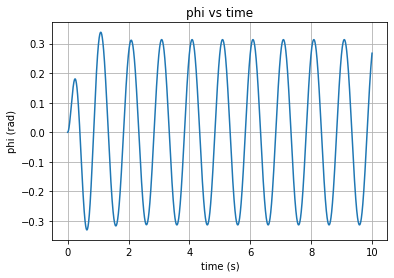

In [85]:
# Define your deriv function, set your initial conditions, and 
# use odeint to solve for the trajectory of the pendulum 

def deriv(vec,time,param):
    phi = vec[0]
    dphi = vec[1]
    gamma = param[0]
    dphir = dphi
    ddphi = -2*beta*dphi-omega0**2*sin(phi)+gamma*omega0**2*cos(omega*time)
    return array([dphir,ddphi], float)

def dDP(phi,dphi,tMax,gamma):
    time = linspace(0,tMax,1000*tMax)
    rInit = array([phi,dphi])
    param = array([gamma])
    r = odeint(deriv, rInit, time, args = (param,))
    time = [[i] for i in time]
    return append(time,r,axis=1)

def pplot(r):
    time = r[:,0]
    phi = r[:,1]
    dphi = r[:,2]
    
    figure()
    grid()
    plot(time,phi)
    title("phi vs time")
    xlabel('time (s)')
    ylabel('phi (rad)')

pplot(dDP(0,0,10,0.2))


### Coding style
#### Exercise 11.5
You are going to be solving the DDP many times for different initial conditions and values of $\gamma$. In order to expedite this, create a function called "solveDDP" to set up and solve the equation of motion for a set of initial conditions over a given period of time. Your function should take the variables *phi0, phiDot0, gamma,* and *maxTime* and return an array containing *time, phi,* and *phiDot*. Rather than overwriting your solutions array each time you investigate different drive strength, give the solution array a different name, reflecting the value of $\gamma$, e.g. "soln_02 = solveDDP()" ## for $\gamma$ = 0.2

Numerically solve the equations of motion for 0 < t < 10, assuming $\gamma$ = 0.02.

Plot $\phi (t) $ vs. t, and check to make sure that your graph makes sense. You will be plotting a lot of different solutions, so another helpful function will be "plotSolution" that will take your solution and plot it with the apppropriate titles and axes labels.

You could even write a function that calls both solveDDP and plotSolution for given i.c., maxTime and gamma.

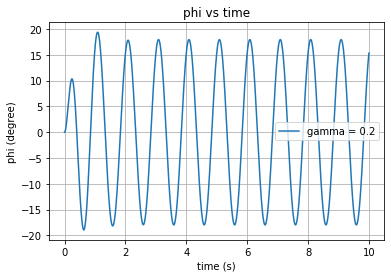

In [96]:
# Define the function solveDDP to set up and solve the equation of motion for a set of ICs over
# a given period of time.

def solveDDP(phi,dphi,tMax,gamma):
    time = linspace(0,tMax,1000*tMax)
    rInit = array([phi,dphi])
    param = array([gamma])
    r = odeint(deriv, rInit, time, args = (param,))
    time = [[i] for i in time]
    return append(time,r,axis=1)

def plotSolution(r,newplot, leg):
    time = r[:,0]
    phi = r[:,1]
    dphi = r[:,2]
    phi = phi/pi*180
    
    if newplot:
        figure()
        grid()
        plot(time,phi, label = leg)
        title("phi vs time")
        xlabel('time (s)')
        ylabel('phi (degree)')
        legend()
    else:
        plot(time,phi,label = leg)
        legend()
    
plotSolution(dDP(0,0,10,0.2),True,'gamma = 0.2')

## Behavior with increasing values of driving
### Long-term behavior with weak driving

#### Exercise 11.6
Use the function you wrote above to solve for $\phi(t)$ over $0 < t < 6$ for at least three different values of $\gamma$ between 0 and 1. Plot $\phi(t)$ vs t for all three systems on the same plot. Include a legend on the graph so that you can easily distinguish between your systems. Examine your graphs to determine the period of the long-term oscillations for each of the values of $\gamma$. In what ways are your plots similar and different? 

    The periods are similar. The larger the gamma, the larger the amplitude. 

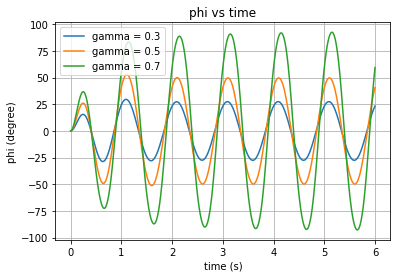

In [97]:
# Motion of a damped, driven pendulum for 0 < gamma < 1
gamma1 = 0.3
gamma2 = 0.5
gamma3 = 0.7

plotSolution(dDP(0,0,6,gamma1),True,'gamma = 0.3')
plotSolution(dDP(0,0,6,gamma2),False,'gamma = 0.5')
plotSolution(dDP(0,0,6,gamma3),False,'gamma = 0.7')


### Intermediate and strong driving
As $\gamma$ is increased slightly above 1 (the divide between weak and strong driving) strange long term behavior starts to appear.

#### Exercise 11.7
First, solve for $\gamma = 1.06$, and include the plot of $\phi(t)$ versus t for $0 < t < 12$. In the space below, describe the motion of the pendulum before $t = 6$ (hint: what does it mean for $\phi$ to be greater than $\pi$?). Also, describe the long-term behavior of the pendulum, including the period.

    Driven force is larger than restoring force. So before t = 6 seconds. The pendulum first rotate 2 cycles counterclockwise. Then rotate about 5/3 cycles clockwise. 
    
    In the long term, the pendulum oscilate between about -200 degrees and 200 degrees.

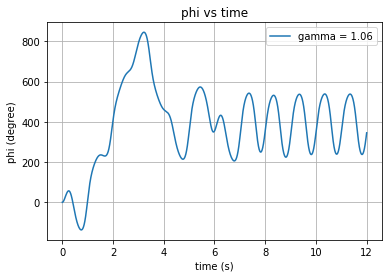

In [99]:
# Motion of a damped, driven pendulum for  gamma = 1.06

plotSolution(dDP(0,0,12,1.06),True,'gamma = 1.06')

As we increase $\gamma$ further yet, we begin to see the emergence of harmonics and subharmonics.  For instance, $\gamma = 1.073$ produces long-term oscillations with alternating values of the maxima and minima.  It now takes twice the period of the driving force for the cycle to repeat so this motion has period ***two*** (alternatively, we could say that this has a subharmonic of 1/2 the driving frequency).

#### Exercise 11.8
Solve for $\gamma = 1.073$ from $0 < t < 30$ and include the plot of $\phi(t)$ versus t below.

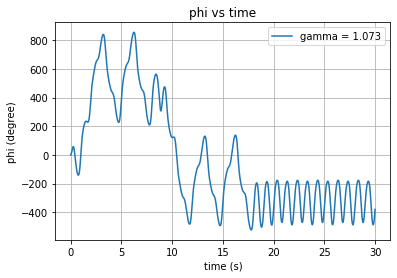

In [100]:
# Motion of a damped, driven pendulum for  gamma = 1.073

plotSolution(dDP(0,0,30,1.073),True,'gamma = 1.073')

Increasing $\gamma$ further yet will produce longer period oscillations in a process called "period-doubling cascade."  

#### Exercise 11.9
Try several more values of gamma between 1.073 and 1.09 and identify a value of $\gamma$ that produces longer period oscillations.  You may need to increase tmax (the time range) in order to reach the point after the transients have died off. Include a plot below.

gamma = 0.85: period is large

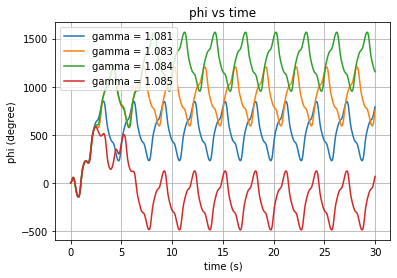

In [108]:
# Motion of a damped, driven pendulum for  1.073 < gamma < 1.09

plotSolution(dDP(0,0,30,1.081),True,'gamma = 1.081')
plotSolution(dDP(0,0,30,1.0845),False,'gamma = 1.083')
plotSolution(dDP(0,0,30,1.084),False,'gamma = 1.084')
plotSolution(dDP(0,0,30,1.085),False,'gamma = 1.085')

Increasing $\gamma$ still more produces ***chaos!***

#### Exercise 11.10
Solve for $\gamma$ = 1.16 and include the plot below.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


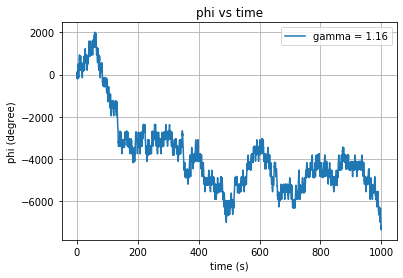

In [112]:
# Motion of a damped, driven pendulum for  gamma = 1.16

plotSolution(dDP(0,0,1000,1.16),True,'gamma = 1.16')

## Sensitivity to Initial Conditions
One of the most important features of chaos is how very slight differences in the initial conditions can lead to wildly different behavior, i.e. "sensitivity to initial conditions." This is why a deterministic system can be in a practical sense completely unpredictable.  It has a host of real-world implications, including the inability for forecasters to accurately predict weather days in advance.

#### Exercise 11.11
Let's start at the non-chaotic end.  Verify that completely different initial conditions, $\phi(0) = 0$ and $\phi(0) = \pi/2$, lead to the same long-term behavior if the driving force is weak ($\gamma$ = 0.7) by plotting the two curves on the same graph. Include a legend on the graph so that you can easily distinguish between the two initial conditions. Additionally, plot the log of the absolute value of the difference between the solutions as a function of time. For convergence the difference between the solutions will decrease exponentially.

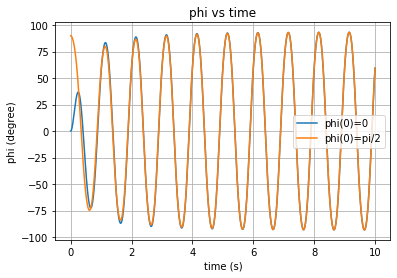

In [115]:
# Plots demonstrating the insensitivity to ICs in the non-chaotic regime

plotSolution(dDP(0,0,10,0.7),True,'phi(0)=0')
plotSolution(dDP(pi/2,0,10,0.7),False,'phi(0)=pi/2')

#### Exercise 11.12
Redo the above plots for slightly strong driving (1.073 < $\gamma$ < 1.09). Include your plots, and in the space below, explain your results in terms of those from exercise 11.9. 

    The amplitude of phi(0)=0 is larger than that for phi(0)=pi/2. It takes phi(0)=0 longer to reach long term motion. 
    

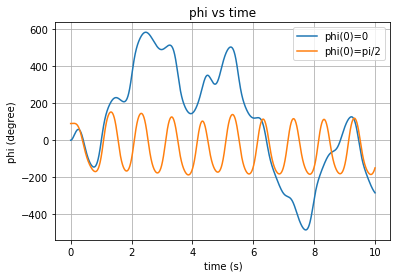

In [118]:
# Plots for different initial conditions with intermediate driving

plotSolution(dDP(0,0,10,1.085),True,'phi(0)=0')
plotSolution(dDP(pi/2,0,10,1.085),False,'phi(0)=pi/2')

#### Exercise 11.13
Now redo the above plots for the primarily chaotic regime ($1.16 < \gamma$), as in exercise 11.10.  Since very slightly different initial conditions should produce very different results, change your $\phi_0$ values so that they are very close together, $\phi(0) = 0$ and $\phi(0) = 0.001$.  Include your plots, and in the space below, explain how your results are indicative of chaos.

    In the short term, the two plots looks similar, but in the long run there is large diviation. 

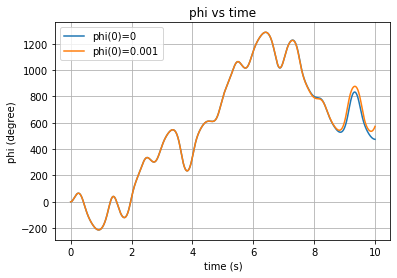

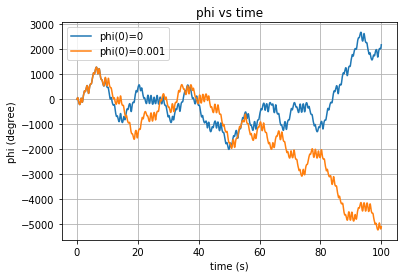

In [127]:
#Sensitivity to initial conditions in the chaotic regime

plotSolution(dDP(0,0,10,1.2),True,'phi(0)=0')
plotSolution(dDP(0.001,0,10,1.2),False,'phi(0)=0.001')

plotSolution(dDP(0,0,100,1.2),True,'phi(0)=0')
plotSolution(dDP(0.001,0,100,1.2),False,'phi(0)=0.001')

Unfortunately this high degree of sensitivity to initial conditions means that it is also very difficult to computationally model chaotic systems. Essentially, small rounding or integration errors in code get hugely magnified. The result is that the same initial conditions simulated with different degrees of tolerance will produce very different behavior.

#### Exercise 11.14
To see this sensitivity to simulation accuracy, plot $\phi$ vs $t$ for 0 < t < 40 using different values of rtol and atol in your odeint call. Start with the default tolerance (atol = rtol = $10^{-8}$) and decrease by factors of ~10 down to the minimum tolerance (atol = rtol = $10^{-13}$). In all cases, set phi0 = 0 and phiDot0 = 0. You should remind yourself of the meaning of atol and rtol, if you've forgotten. Also, recognize that you won't use your solveDDP function as written. It will probably be easier here to use odeint directly. 

Make a point of creating a larger figure (for example *matplotlib.rcParams['figure.figsize'] = (12, 9)*) and adding a legend with a label for each trace such as *tol =$10^{n}$* so that you can inspect in a meaningful way how the tolerances affect (or don't affect) the accuracy of time evolution of the system.

Experiment with longer maxTimes. The upshot is that since the trajectories diverge, we are unable to predict with any accuracy the state of the pendulum after some length of time. (This is the same reason why weather predictions a week out are so inaccurate.) Luckily, though, we can still use simulations to tell us about the statistical properties of chaotic system. We'll be examining this next week through bifurcation diagrams and Poincaré plots.


In [133]:
def solveDDP(tol,tMax):
    phi = 0
    dphi = 0
    gamma = 1.2
    time = linspace(0,tMax,1000*tMax)
    rInit = array([phi,dphi])
    param = array([gamma])
    r = odeint(deriv, rInit, time,atol = tol, rtol = tol, args = (param,))
    time = [[i] for i in time]
    return append(time,r,axis=1)

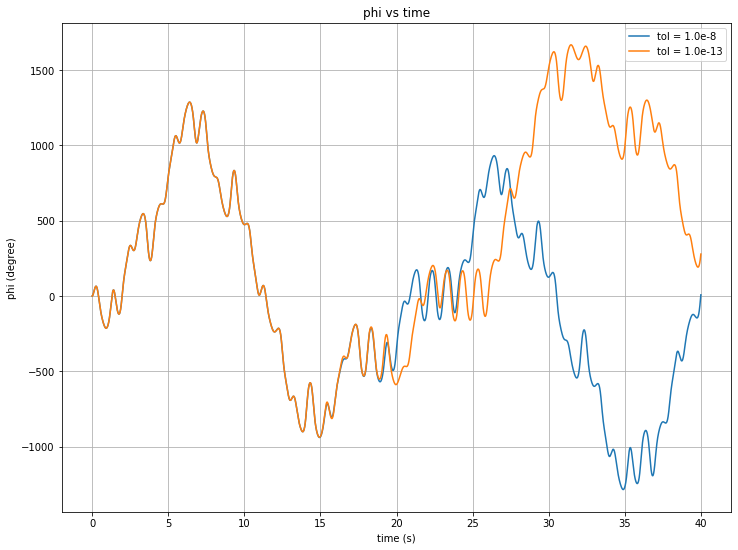

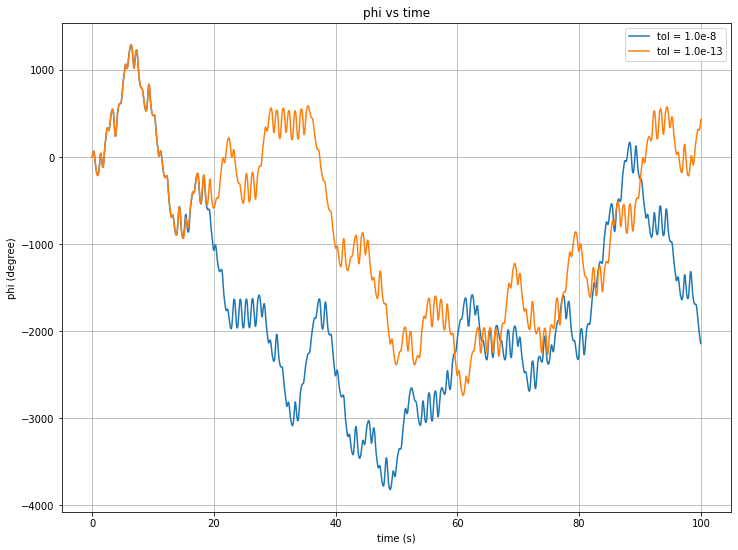

In [137]:
#Accuracy of integration in chaotic regime
matplotlib.rcParams['figure.figsize'] = (12, 9)
plotSolution(solveDDP(1.0e-8,40),True,'tol = 1.0e-8')
plotSolution(solveDDP(1.0e-13,40),False,'tol = 1.0e-13')

plotSolution(solveDDP(1.0e-8,100),True,'tol = 1.0e-8')
plotSolution(solveDDP(1.0e-13,100),False,'tol = 1.0e-13')

## Check-out
#### Exercise 10.15

Briefly summarize in the cell below the ideas in today's lab.

   
   In this week's lab, we learned calculating the motoin of driven damped pendulum. A little change in phi and gammar will cause huge change in the movement of pendulum. 